In [1]:
ee_group_tf = {}
with open("/home/mouren/Data/final_files_tokeep/notes/ee_grouped_tf") as file:
    for line in file:           
        ee_group_tf[line.strip().split()[0]] = int(line.strip().split()[1])

af_ee = []
res_by_group = {}
with open('/mnt/project/exonhancer/ZENODO_REPO_DISCARDED_JC_DONT_TOUCH/gnomADv3_analysis/0_get_snp_gnomad/exons/vcf_by_chr/hg38_EE_gnomAD_AF.tsv') as f:
    for line in f:
        group = ee_group_tf[line.strip().split()[0]]
        
        if group not in res_by_group:
            res_by_group[group] = {"Ultra-rare":0,"Rare":0,"Low-freq":0,"Common":0}

        for variant in (line.strip().split()[4]).split(";"):
            af_ee.append(float(variant))
            if float(variant) <= 0.0001:
                res_by_group[group]["Ultra-rare"] += 1
            elif float(variant) <= 0.001:
                res_by_group[group]["Rare"] += 1
            elif float(variant) <= 0.01:
                res_by_group[group]["Low-freq"] += 1
            else:
                res_by_group[group]["Common"] += 1

In [2]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
contingency_df = pd.DataFrame(res_by_group).T  # Rows = groups, Columns = categories

# Optional: ensure consistent category order
category_order = ["Ultra-rare", "Rare", "Low-freq", "Common"]
contingency_df = contingency_df[category_order]

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_df.values)

print("Chi-square test results:")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4e}")

import numpy as np

n = contingency_df.values.sum()
phi2 = chi2 / n
r, k = contingency_df.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print(f"Cramér's V = {cramers_v:.4f}")



Chi-square test results:
Chi2 statistic = 121.5877
Degrees of freedom = 27
P-value = 5.7601e-14
Cramér's V = 0.0068


In [30]:
total_dic = {}
res_perc_total = {}
for key,val in res_by_group.items():
    total = val["Ultra-rare"] + val["Rare"] + val["Low-freq"] + val["Common"]
    total_dic[key] = total
    res_perc_total[key] = {"Ultra-rare":0,"Rare":0,"Low-freq":0,"Common":0}
    for key2,val2 in val.items():
        res_perc_total[key][key2] = (val2*100)/total

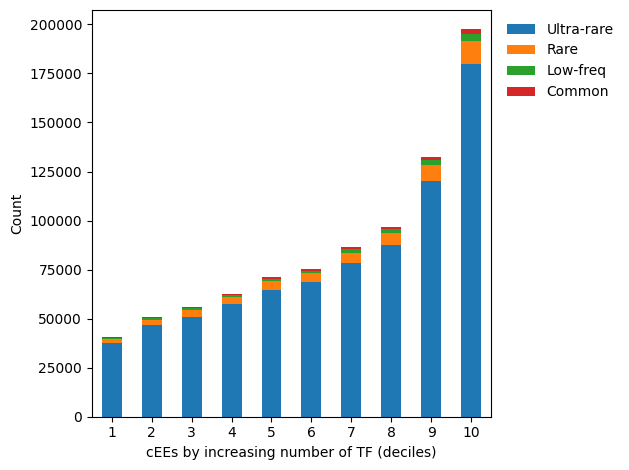

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from statannot import add_stat_annotation
import seaborn as sns
from scipy.stats import chi2_contingency
matplotlib.rcParams['pdf.fonttype'] = 42

df = pd.DataFrame(res_by_group).T  # Transpose: rows = groups, columns = categories
df.index.name = "Group"

df = df.sort_index()  # This works only if the index is integer

ax = df.plot(kind='bar', stacked=True)

#plt.ylim(0,100)
plt.ylabel("Count")
plt.xlabel("cEEs by increasing number of TF (deciles)")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.01, 1),frameon=False, loc='upper left')
plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt13_gnomad_deciles_count.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/revisions/rev_1_pt13_gnomad_deciles_count.png", format="png", bbox_inches="tight", dpi=450)

plt.show()